In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oSq21nk6YA7JS80deVrH")
project = rf.workspace("project-hv5yx").project("computer_vision-5nx0j")
version = project.version(1)
dataset = version.download("yolov8-obb")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 883.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Computer_Vision-1 in yolov8-obb:: 100%|██████████| 9418/9418 [00:01<00:00, 4828.99it/s]


In [ ]:
import os

def update_first_number_to_zero(input_folder, output_folder):
    """
    Updates only the first number (class ID) in each line of YOLO label files to 0.

    Parameters:
        input_folder (str): Path to folder containing YOLO label files.
        output_folder (str): Path to save updated label files.
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each file in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".txt"):  # Process only .txt files
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name)

            with open(input_path, "r") as infile, open(output_path, "w") as outfile:
                for line in infile:
                    parts = line.strip().split()  # Split line into components
                    if len(parts) > 0:
                        parts[0] = '0'  # Change the first number (class ID) to 0
                        new_line = " ".join(parts)  # Reassemble the line
                        outfile.write(new_line + "\n")  # Write updated line to output file

    print("First number (class IDs) updated to 0 and saved to:", output_folder)

# Example usage
input_folder = "Computer_Vision-1/test/labelss"
output_folder = "Computer_Vision-1/test/labels"
update_first_number_to_zero(input_folder, output_folder)

First number (class IDs) updated to 0 and saved to: Computer_Vision-1/test/labels


In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 15.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Step 1: Load the YOLOv8 model (you can choose different versions based on your needs)
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' is the nano model, use 'yolov8s.pt', 'yolov8m.pt' etc. for other versions

# Step 2: Train the model
results = model.train(
    data='Computer_Vision-1/data.yaml',  # Updated path to data.yaml
    epochs=25,             # Set the number of epochs for training
    imgsz=640,             # Image size (typically 640x640)
    batch=32,              # Batch size (adjust based on your GPU memory)
    device=0,              # Use GPU (0 means first GPU, set to -1 if using CPU)
    workers=4,             # Number of workers for data loading (increase for faster loading)
    name='yolov8_training' # Name of the training run (saved in the "runs" folder)
)

# Step 3: Evaluate the model on the test set
metrics = model.val(data='Computer_Vision-1/data.yaml', split='test')

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Computer_Vision-1/data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=yolov8_training3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning /content/Computer_Vision-1/train/labels.cache... 4116 images, 9 backgrounds, 17 corrupt: 100%|██████████| 4116/4116 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f12_kn_g3_8_jpg.rf.04a438b9f579f07f60f7dd4b3481d112.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0003      1.0316]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f12_kn_g3_8_jpg.rf.e61978f1b7d4584d8127a9c02b0a3a00.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0212]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f13_kn_g3_7_jpg.rf.07ec0f358241c09a08e8ac9c50fefb8f.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0684]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f13_kn_g3_7_jpg.rf.d470fc80c15e20b54f9250799d988d73.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.082]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f14_kn_g3_2_jpg.rf.30b40e101e45d37fa09f2cee6db3933e.jpg: ignoring corrupt image/label: non-normalized or out of bounds


val: Scanning /content/Computer_Vision-1/valid/labels.cache... 391 images, 0 backgrounds, 1 corrupt: 100%|██████████| 391/391 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/Computer_Vision-1/valid/images/f5_kn_g3_3_jpg.rf.ed600f13893cd485ce07b10f71cf8cdf.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0294]


Plotting labels to runs/detect/yolov8_training3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_training3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25       4.8G      1.782      2.177      1.586          9        640: 100%|██████████| 129/129 [01:35<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]


                   all        390       1022      0.569        0.5      0.501      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.25G      1.723      1.689      1.523         19        640: 100%|██████████| 129/129 [01:30<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


                   all        390       1022      0.631      0.585      0.613      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.23G      1.707       1.57      1.521         18        640: 100%|██████████| 129/129 [01:30<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


                   all        390       1022      0.647      0.509      0.541      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.22G      1.705      1.538      1.528         16        640: 100%|██████████| 129/129 [01:32<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        390       1022      0.709      0.571      0.636      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.21G      1.647      1.459      1.496         16        640: 100%|██████████| 129/129 [01:29<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        390       1022      0.693      0.663      0.685      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.22G      1.626      1.406      1.485         24        640: 100%|██████████| 129/129 [01:29<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        390       1022       0.75      0.635      0.722      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.28G      1.601      1.333      1.457         19        640: 100%|██████████| 129/129 [01:34<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        390       1022      0.779      0.609      0.682      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.24G      1.566      1.316      1.431         15        640: 100%|██████████| 129/129 [01:29<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


                   all        390       1022      0.799      0.678      0.766      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      4.21G       1.57      1.292      1.428         14        640: 100%|██████████| 129/129 [01:27<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        390       1022      0.788      0.667      0.741      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.24G      1.532      1.253      1.416         15        640: 100%|██████████| 129/129 [01:30<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        390       1022      0.835      0.677      0.776      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.21G       1.52      1.217      1.413         11        640: 100%|██████████| 129/129 [01:27<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        390       1022      0.849      0.678      0.782      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.27G      1.511      1.196      1.391         11        640: 100%|██████████| 129/129 [01:30<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        390       1022      0.838      0.678      0.764      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       4.2G      1.495      1.175      1.378         25        640: 100%|██████████| 129/129 [01:31<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        390       1022      0.827      0.678      0.771      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.23G      1.486      1.156      1.375         27        640: 100%|██████████| 129/129 [01:26<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]

                   all        390       1022      0.828      0.709      0.789      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.26G      1.478      1.142      1.375         12        640: 100%|██████████| 129/129 [01:27<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        390       1022      0.838      0.708      0.788      0.486


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      4.31G      1.381     0.9644       1.32          6        640: 100%|██████████| 129/129 [01:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]

                   all        390       1022      0.799      0.686      0.768      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      4.16G      1.371     0.9486      1.312          3        640: 100%|██████████| 129/129 [01:16<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        390       1022      0.857      0.699      0.796       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      4.23G      1.348     0.8969        1.3          7        640: 100%|██████████| 129/129 [01:17<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        390       1022      0.818      0.723      0.794        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      4.16G       1.34     0.8786      1.293          7        640: 100%|██████████| 129/129 [01:15<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        390       1022      0.865      0.702      0.793      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      4.17G      1.314     0.8416      1.273         10        640: 100%|██████████| 129/129 [01:18<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


                   all        390       1022      0.844      0.712      0.802      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      4.13G      1.305     0.8264      1.265          8        640: 100%|██████████| 129/129 [01:17<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        390       1022      0.865      0.709      0.797      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      4.21G      1.273     0.7845      1.245          7        640: 100%|██████████| 129/129 [01:17<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        390       1022      0.856      0.713        0.8      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      4.13G      1.257     0.7749      1.234          4        640: 100%|██████████| 129/129 [01:17<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        390       1022       0.89      0.734      0.811      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      4.14G      1.246     0.7489      1.229         11        640: 100%|██████████| 129/129 [01:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        390       1022      0.849      0.751      0.813      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       4.2G      1.238     0.7391      1.216          7        640: 100%|██████████| 129/129 [01:17<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        390       1022      0.881      0.738      0.816      0.534



25 epochs completed in 0.636 hours.
Optimizer stripped from runs/detect/yolov8_training3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_training3/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_training3/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


                   all        390       1022      0.882      0.739      0.817      0.534
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/yolov8_training3
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Computer_Vision-1/test/labels... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<00:00, 496.01it/s]


val: New cache created: /content/Computer_Vision-1/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


                   all        196        489      0.877      0.732      0.813      0.524
Speed: 0.4ms preprocess, 5.7ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/yolov8_training32


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Computer_Vision-1/test/labels.cache... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


                   all        196        489      0.877      0.732      0.813      0.524
Speed: 0.4ms preprocess, 4.3ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/yolov8_training33
Model Evaluation Metrics:
Precision: 0.5241
Recall: 0.5241
mAP@0.5: 0.8132
mAP@0.5:0.95: 0.5241
Average IoU: 0.8132


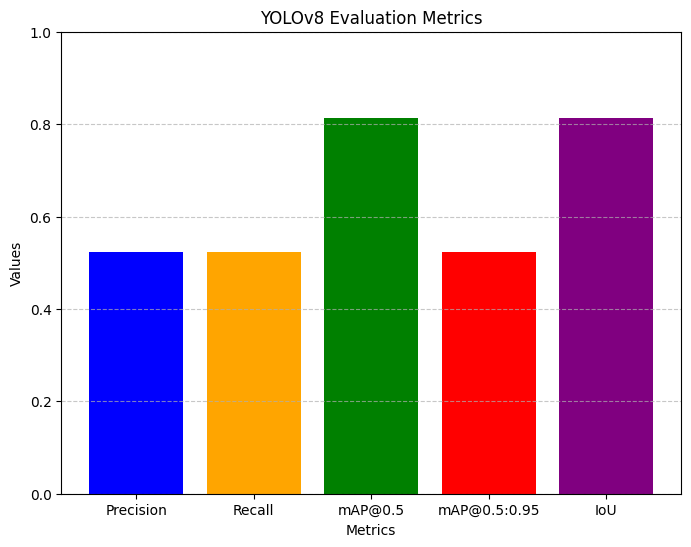

In [ ]:
from matplotlib import pyplot as plt

# Step 3: Evaluate the model on the test set
metrics = model.val(data='Computer_Vision-1/data.yaml', split='test')  # Evaluate the test set if available
if metrics:
    # Access metrics through the 'box' attribute
    precision = metrics.box.maps[0]  # Precision (mAP@0.5) for class 0
    recall = metrics.box.maps[0]    # Recall (mAP@0.5) for class 0
    map50 = metrics.box.map50       # Access map50 directly
    map_5095 = metrics.box.map       # Access map_5095 (mAP@0.5:0.95) directly
    # iou = metrics.box.maps[0.5]  # Access IoU (mAP@0.5) - This line caused the error
    iou = metrics.box.map50 # IoU is usually represented by mAP@0.5 in YOLOv8

    # Print metrics
    print("Model Evaluation Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"mAP@0.5: {map50:.4f}")
    print(f"mAP@0.5:0.95: {map_5095:.4f}")
    print(f"Average IoU: {iou:.4f}")

    # Step 4: Plot the metrics
    metric_names = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95', 'IoU']
    metric_values = [precision, recall, map50, map_5095, iou]

    plt.figure(figsize=(8, 6))
    plt.bar(metric_names, metric_values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.ylim(0, 1)  # Metrics are between 0 and 1
    plt.title('YOLOv8 Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No evaluation metrics available.")